# Introduction to Data Science – DS GA 1001 Capstone Project
# Group 52
# Runhan Chen & Jinrui Fang

In [2]:
# Load the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seed the random number generator
seed_value = 19202232

In [4]:
# Load the data
music = pd.read_csv('spotify52kData.csv')
rating = pd.read_csv('starRatings.csv')

In [5]:
music.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
rating.head()

,NaN,NaN.1,NaN.2,NaN.3,NaN.4,NaN.5,NaN.6,NaN.7,NaN.8,NaN.9,...,NaN.4462,0.152,NaN.4463,NaN.4464,NaN.4465,NaN.4466,NaN.4467,NaN.4468,NaN.4469,NaN.4470
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# 1. Data Handling

In [7]:
# Check music dataset
music.isna().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [8]:
# Check the skewed distributions or extreme values in music dataset

# Summary statistics for numerical columns
music.describe()

,songNumber,popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,52000.000000,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000
mean,25999.500000,33.115923,2.302998e+05,0.563900,0.668259,5.348442,-7.972804,0.622904,0.095864,0.271442,0.182884,0.212527,0.451814,123.558120,3.916308
std,15011.251336,21.743697,1.176823e+05,0.176573,0.249585,3.562600,4.919127,0.484664,0.131501,0.322322,0.325275,0.187986,0.255314,29.242142,0.400671
min,0.000000,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-42.044000,0.000000,0.000000,0.000000,0.000000,0.011200,0.000000,0.000000,0.000000
25%,12999.750000,18.000000,1.739470e+05,0.447000,0.508000,2.000000,-9.578000,0.000000,0.036800,0.007260,0.000000,0.097200,0.238000,100.979000,4.000000
50%,25999.500000,33.000000,2.135460e+05,0.574000,0.717000,6.000000,-6.696000,1.000000,0.051200,0.106000,0.000161,0.132000,0.431000,123.366000,4.000000
75%,38999.250000,50.000000,2.651962e+05,0.696000,0.877000,9.000000,-4.849000,1.000000,0.093000,0.499000,0.168000,0.275000,0.653000,141.944000,4.000000
max,51999.000000,100.000000,4.789026e+06,0.983000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.997000,0.995000,0.995000,243.372000,5.000000


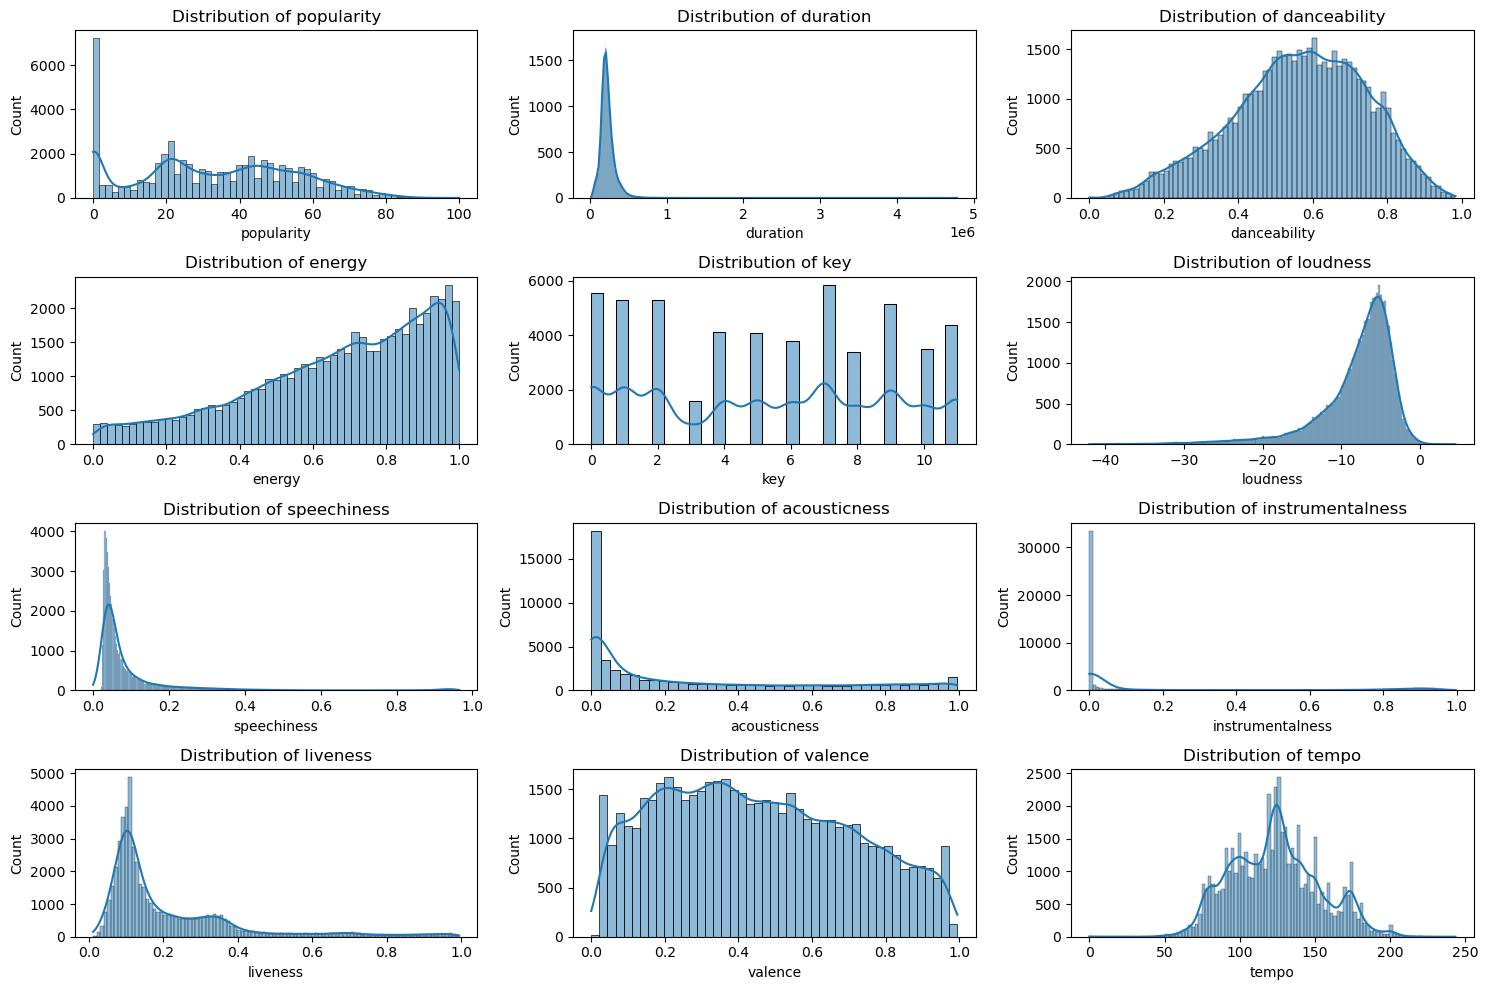

popularity           0.079294
duration            11.565373
danceability        -0.299694
energy              -0.730231
key                 -0.012035
loudness            -2.019584
speechiness          4.318930
acousticness         0.966942
instrumentalness     1.477542
liveness             2.074428
valence              0.230075
tempo                0.240884
dtype: float64

In [9]:
# Plotting distributions of a few numerical columns to check for skewness
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# List of columns to check for skewness
columns_to_plot = music.columns.drop(['artists', 'album_name', 'track_name', 'songNumber', 'mode', 'explicit','time_signature','track_genre'])

for i, col in enumerate(columns_to_plot):
    sns.histplot(music[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

music[columns_to_plot].skew()

In [10]:
# There are duplicate songs collected in different genre, we also want to remove the duplicate when we do not care the genre in the analysis
unique_songs = music.drop_duplicates(subset=['artists', 'album_name', 'track_name'], keep='first')

In [11]:
# Check for the ratings datasets
rating.isna().sum()

NaN         9019
NaN.1       8988
NaN.2       8942
NaN.3       8973
NaN.4       8969
            ... 
NaN.4466    9018
NaN.4467    8984
NaN.4468    8985
NaN.4469    8980
NaN.4470    8950
Length: 5000, dtype: int64

In [12]:
new_header = music.iloc[:5000]['songNumber'] 
rating.columns = new_header 
rating

songNumber,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Imputes missing ratings based on the average rating of each song across all users.
rating_imputed = rating.fillna(rating.mean())

In [14]:
rating_imputed.isna().sum()

songNumber
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

### 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

We found the correlation between the song length and popularity of a song is around -0.019 and it is statistically significant.It is very small.
What is more, the regression model created by the song length and popularity of a song indicated by the R-squared value of 0.000, which shows that the duration of a song explains virtually none of the variability in its popularity.

In summary, while there is a statistically significant negative correlation between song duration and popularity, this effect is very small and does not explain most of the variation in song popularity. Other factors not included in the model are likely to have a much greater effect on song popularity.

In [15]:
unique_songs[['popularity', 'duration']].skew()
# We decide the skewness from -0.5 to 0.5, then the distribution almost symmetrical
# Duration: song length is positively skewed. We use log transformation to address in Duration.

popularity     0.097420
duration      11.218866
dtype: float64

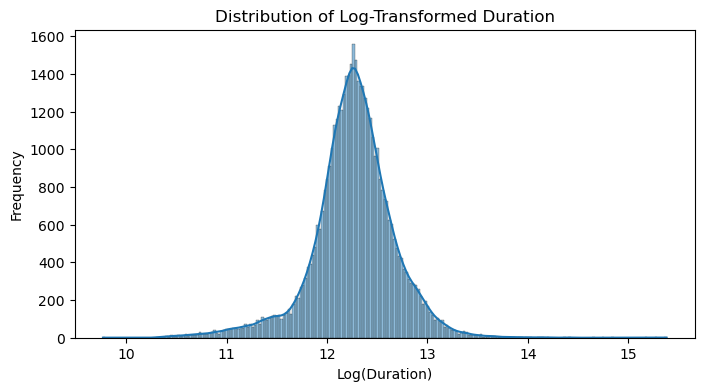

In [16]:
popularity = unique_songs['popularity']
# Applying a logarithmic transformation to the duration data
transformed_duration = np.log(unique_songs['duration'])

# Checking the distribution of the transformed data
plt.figure(figsize=(8, 4))
sns.histplot(transformed_duration, kde=True)
plt.title('Distribution of Log-Transformed Duration')
plt.xlabel('Log(Duration)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Calculating the correlation
# We use pearsonr for analyzing the relationship between two continuous variables. 
# And both variables are normally distributed and that the relationship between them is linear
transformed_correlation_coefficient, transformed_p_value = pearsonr(transformed_duration, unique_songs['popularity'])

transformed_correlation_coefficient, transformed_p_value

(-0.03135905098014219, 1.885191344328409e-11)

In [18]:
# Simple Linear Regression
# Adding a constant to the model (for the intercept)
transformed_duration_with_constant = sm.add_constant(transformed_duration)

# Fitting the linear regression model
model = sm.OLS(popularity, transformed_duration_with_constant)
results = model.fit()

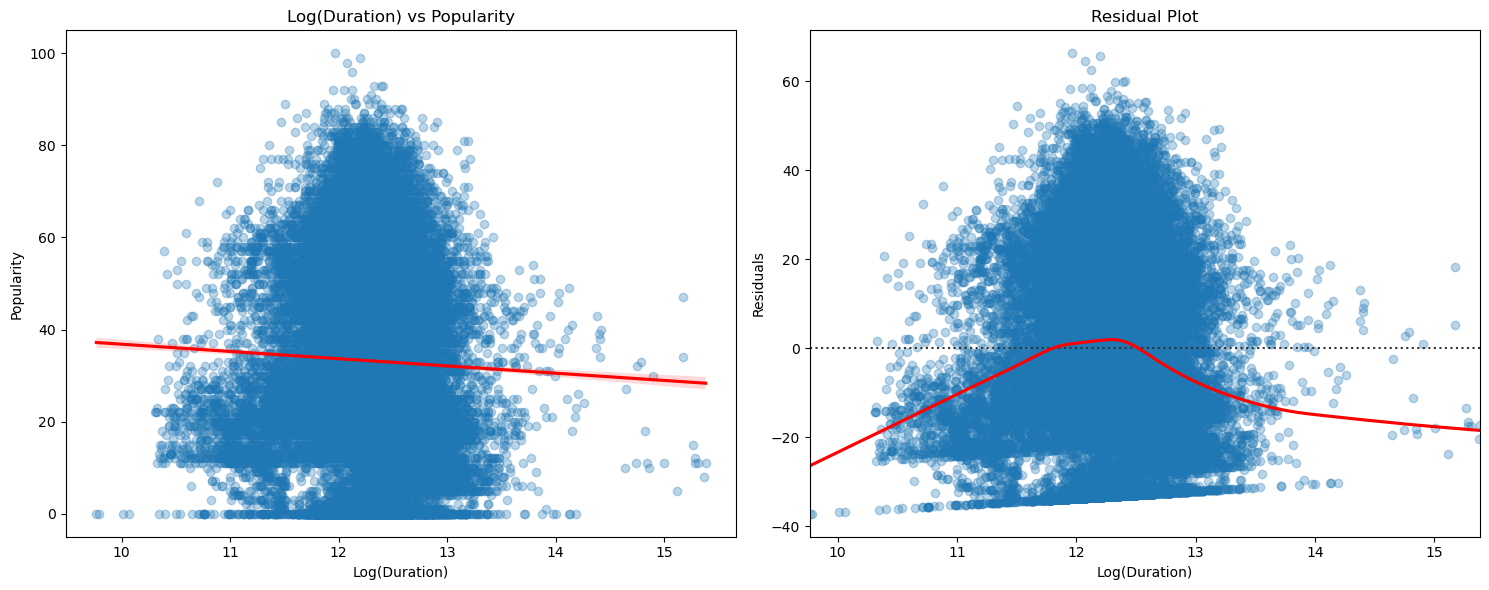

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     45.11
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.89e-11
Time:                        19:15:59   Log-Likelihood:            -2.0415e+05
No. Observations:               45828   AIC:                         4.083e+05
Df Residuals:                   45826   BIC:                         4.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5693      2.876     18.278      0.000      46.932      58.207
duration      -1.5747      0.234     -6.716      0.000      -2.034      -1.115
==============================================================================
Omnibus:                     4621.247   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1393.886
Skew:                           0.095   Prob(JB):                    2.10e-303
Kurtosis:                       2.167   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Creating enhanced scatter plot with regression line and residuals plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with regression line
sns.regplot(x=transformed_duration, y=popularity, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=ax1)
ax1.set_title('Log(Duration) vs Popularity')
ax1.set_xlabel('Log(Duration)')
ax1.set_ylabel('Popularity')

# Residual plot
sns.residplot(x=transformed_duration, y=popularity, lowess=True, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=ax2)
ax2.set_title('Residual Plot')
ax2.set_xlabel('Log(Duration)')
ax2.set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Displaying the regression results summary
model_summary = results.summary()
model_summary

### 2) Are explicitly rated songs more popular than songs that are not explicit?

We found the p-value (2.95e-21) indicates that the difference in popularity between explicitly rated songs and non-explicit songs is statistically significant. This means that the observed difference in their average popularity scores is unlikely to be due to random chance.

The average popularity of explict music is 3.022 more than songs that are not explicit. However, the cohen d is around 0.139 indicates a small effect size. Hence, we can conclude that explicitly rated songs are more popular than songs that are not explicit, but the difference is not huge.

In [20]:
# Split the data into explicitly rated songs and not explicited rated songs
popularity_explicit = unique_songs[unique_songs['explicit'] == True]['popularity']
popularity_non_explicit = unique_songs[unique_songs['explicit'] == False]['popularity']
popularity_explicit.shape, popularity_non_explicit.shape

((5107,), (40721,))

In [21]:
popularity_explicit.var(), popularity_non_explicit.var()

(481.9521300188466, 426.8868121860492)

Text(0.5, 1.0, 'Distribution of popularity_non_explicit')

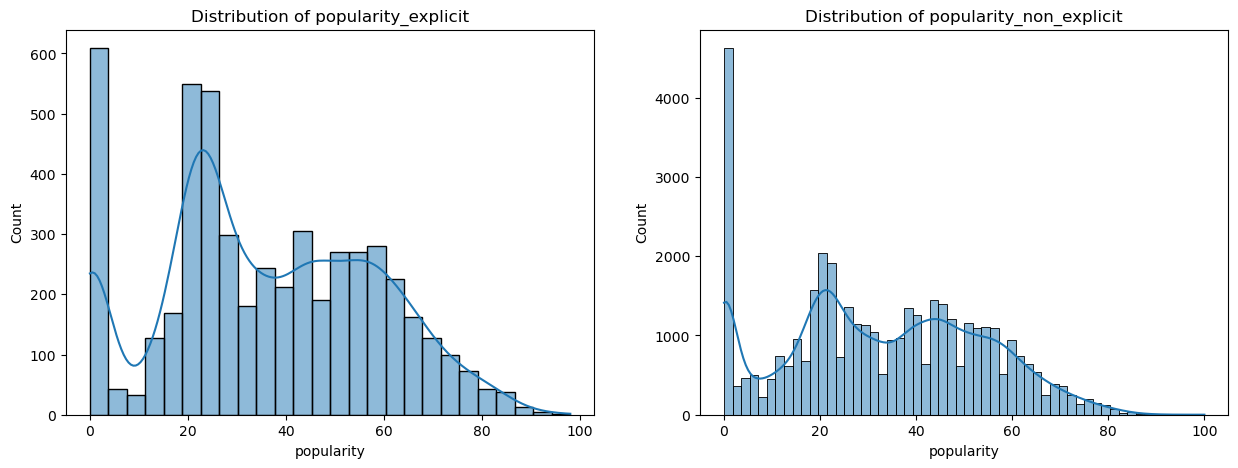

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(popularity_explicit, kde=True, ax=axes[0])
axes[0].set_title('Distribution of popularity_explicit')

sns.histplot(popularity_non_explicit, kde=True, ax=axes[1])
axes[1].set_title('Distribution of popularity_non_explicit')

In [23]:
# It is not reasonable to reduce the data to sample means
# The data are not categorical. 
# We have two samples to compare
# We compare the medians between the twe groups
# Hence, we decide to choose Mann Whitney U test.
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(popularity_explicit, popularity_non_explicit)

# Display the results
u_statistic, p_value

(111578985.5, 1.453824428115968e-17)

In [24]:
# Calculating effect size using Cohen's d formula
def cohen_d(group1, group2):
   
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Calculating the pooled standard deviation
    n1, n2 = len(group1), len(group2)
    
    # Average spread of the group mean
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

In [25]:
cohen_d(popularity_explicit, popularity_non_explicit)

0.13941414511114855

In [26]:
# The difference between the two groups
popularity_explicit.median() - popularity_non_explicit.median()

2.0

### 3) Are songs in major key more popular than songs in minor key? 

We found the p-value (1.66e-06) indicates that the difference in popularity between major key and minor key songs is statistically significant. This means that the observed difference in their average popularity scores is unlikely to be due to random chance.

The average popularity of major key music is 0.948 less than songs that are minor key. However, the cohen d is around -0.04 indicates a very small effect size. Hence, we can conclude that songs in major key are less popular than songs in minor key, but the effect size is very small which indicates in practical scenarios, it is not meaningful.

In [27]:
# Split the data major key songs and minor key songs
popularity_major = unique_songs[unique_songs['mode'] == 1]['popularity']
popularity_minor = unique_songs[unique_songs['mode'] == 0]['popularity']
popularity_major.shape, popularity_minor.shape

((28721,), (17107,))

In [28]:
popularity_major.var(), popularity_minor.var()

(426.9542327836017, 444.703593911013)

Text(0.5, 1.0, 'Distribution of popularity_minor')

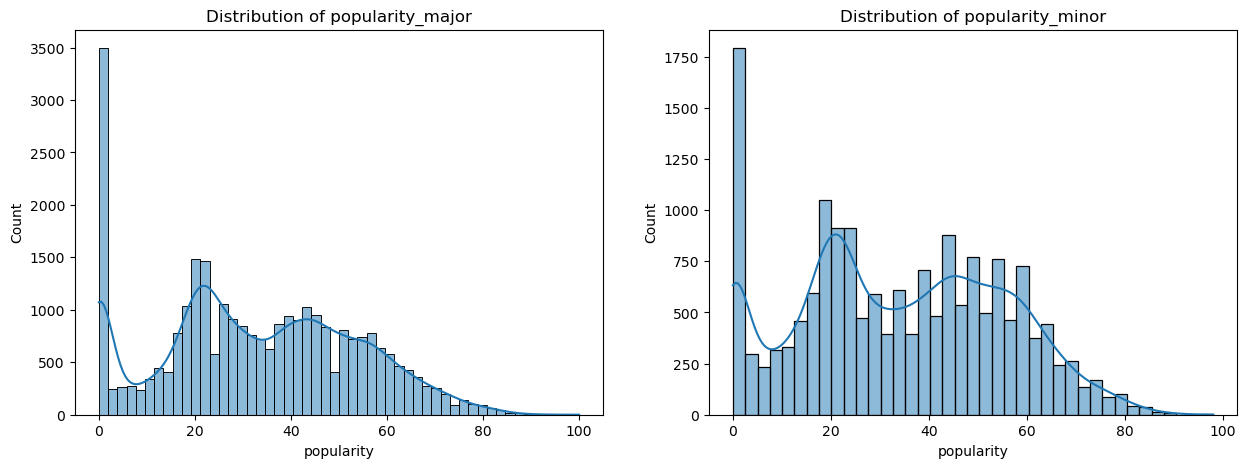

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(popularity_major, kde=True, ax=axes[0])
axes[0].set_title('Distribution of popularity_major')

sns.histplot(popularity_minor, kde=True, ax=axes[1])
axes[1].set_title('Distribution of popularity_minor')

In [30]:
# It is not reasonable to reduce the data to sample means
# The data are not categorical. 
# We have two samples to compare
# We compare the medians between the twe groups

# Hence, we decide to choose Mann Whitney U test.

u_statistic, p_value = mannwhitneyu(popularity_major, popularity_minor)

# Display the results
u_statistic, p_value

(238963582.5, 9.82047849356169e-07)

In [31]:
popularity_major.median(), popularity_minor.median()

(32.0, 33.0)

In [32]:
popularity_major.median() - popularity_minor.median()

-1.0

In [33]:
# Calculating effect size using Cohen's d formula
def cohen_d(group1, group2):
   
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Calculating the pooled standard deviation
    n1, n2 = len(group1), len(group2)
    
    # Average spread of the group mean
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))

    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

cohen_d(popularity_major, popularity_minor)

-0.052157486322451575

### 4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

THe best predictor is loudness, but r-squared of 0.003985 suggests that only about 0.4% of the variability in song popularity is explained by loudness, indicating a weak predictive power.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting the features and target variable
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

model_info = pd.DataFrame(columns=['Features', 'R_squared'])

for feature in features:
    X = unique_songs[feature].values.reshape(-1, 1)
    y = unique_songs['popularity'].values.reshape(-1, 1)

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed_value)

    # Creating and fitting the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting on the test set and calculating R-squared
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    # Add the model information to the table
    model_info = model_info.append({'Features': feature, 'R_squared': r_squared}, ignore_index = True)

In [35]:
model_info # The best one is instrumentalness, and R_squared is 0.025973. The relationship between loudness and popularity is very weak.

,Features,R_squared
0,duration,0.003769
1,danceability,0.001541
2,energy,0.003898
3,loudness,0.002816
4,speechiness,0.003400
5,acousticness,0.000920
6,instrumentalness,0.025973
7,liveness,0.002437
8,valence,0.000756
9,tempo,0.000088


### 5) Building a model that uses *all* of the song features mentioned in question 1, how well can you predict popularity? 
### How much (if at all) is this model improved compared to the model in question 4). 
### How do you account for this? What happens if you regularize your model?

The multivariate models show a slight improvement in predictive power over the single-feature model that used only loudness (R-squared of 0.003985). This indicates that incorporating multiple features offers a slightly better explanation of the variability in song popularity.

The R-squared values are still quite low, indicating that only about 4% of the variability in song popularity is explained by the combined features. This suggests that while these features do contribute to explaining popularity, a large portion of the variability remains unexplained.

The RMSE values are moderately high, indicating that the predictions of the model could be quite far off the actual values.

The Ridge and Lasso regressions, which include regularization, show very similar performance to the basic multivariate model. This suggests that overfitting might not be a significant issue in this case.

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Independent variables
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = unique_songs[features]

# Dependent variable
y = unique_songs['popularity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [37]:
# Creating and fitting the multivariate linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_multi = multi_model.predict(X_test)

# Evaluating the multivariate model
r_squared_multi = r2_score(y_test, y_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))
r_squared_multi

0.054656136579569026

In [38]:
# Creating and fitting a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r_squared_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Creating and fitting a Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r_squared_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [39]:
output = {
    "Multivariate Model": {"R-squared": r_squared_multi, "RMSE": rmse_multi},
    "Ridge Regression": {"R-squared": r_squared_ridge, "RMSE": rmse_ridge},
    "Lasso Regression": {"R-squared": r_squared_lasso, "RMSE": rmse_lasso}
}

output

{'Multivariate Model': {'R-squared': 0.054656136579569026,
  'RMSE': 20.260946300101793},
 'Ridge Regression': {'R-squared': 0.054656193797164576,
  'RMSE': 20.260945686947842},
 'Lasso Regression': {'R-squared': 0.05020713134439525,
  'RMSE': 20.308566669973217}}

### 6) When considering the 10 song features in the previous question, how many meaningful principal components can you extract? 
### What proportion of the variance do these principal components account for? 
### Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data? 

When talking about “principal components” above, we mean the transformed data, rotated 
into the new coordinate system by the PCA

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
# Independent variables
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = music[features]
zscoreX = stats.zscore(X)
# Initialize PCA object and fit to our data:
pca = PCA().fit(zscoreX)

# Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# Loadings (eigenvectors): Weights per factor in terms of the original data.
loadings = pca.components_*-1

# Rotated Data - simply the transformed data:
origDataNewCoordinates = pca.fit_transform(zscoreX)*-1

# Proportion of variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2733881 , 0.16173598, 0.13845787, 0.0979588 , 0.08752094,
       0.08148307, 0.06782686, 0.0471572 , 0.03131337, 0.01315782])

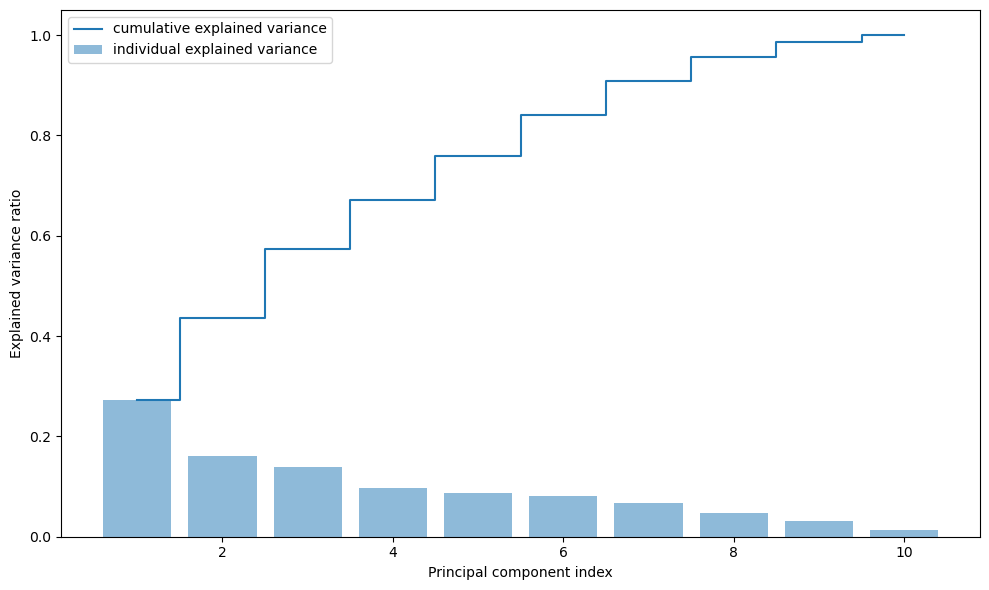

In [41]:
# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

for n_clusters in range(2, 12):
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed_value)
    cluster_labels = clusterer.fit_predict(origDataNewCoordinates)

    # Calculate the average silhouette score
    silhouette_avg.append(silhouette_score(origDataNewCoordinates, cluster_labels))

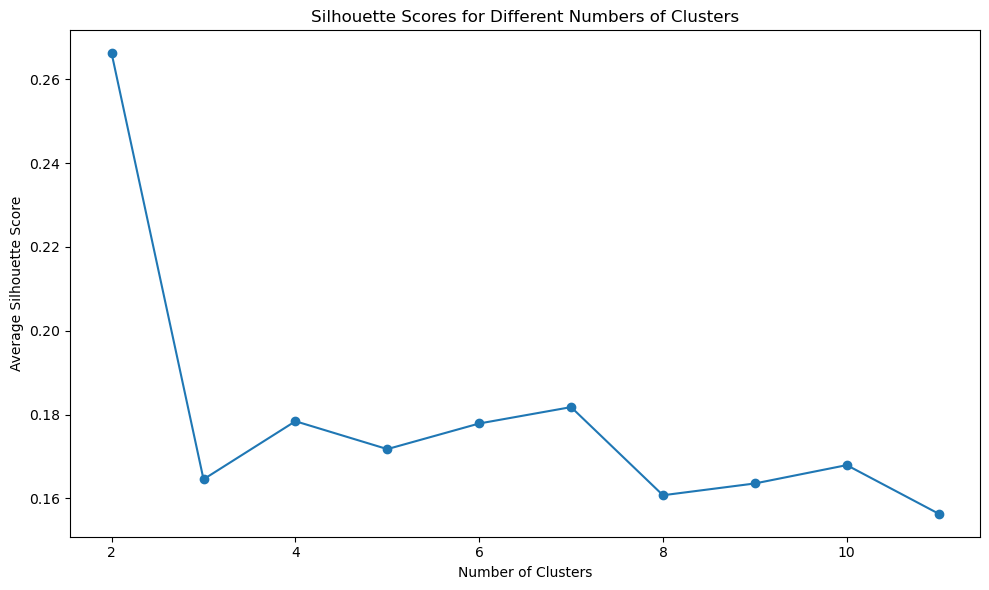

In [43]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 12), silhouette_avg, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.tight_layout()
plt.show()

In [44]:
# Finding the number of clusters with the highest silhouette score
optimal_clusters = 2
optimal_clusters, max(silhouette_avg)

(2, 0.2661621426925405)

In [45]:
music['track_genre'].unique().shape
# There are 52 different groups of data.

(52,)

### 7) 
### Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? 
### If so, how good is this prediction? If not, is there a better one? 

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# Predic a song is in major or minor key from valence using SVM and logistic regression
# Data prepartion
# Drop the duplicate rows
unique_songs = music.drop_duplicates(subset=['artists', 'album_name', 'track_name'], keep='first')
X = unique_songs['valence'].values.reshape(-1,1)
y = unique_songs['mode'].values.reshape(-1,1)

<Axes: xlabel='mode', ylabel='count'>

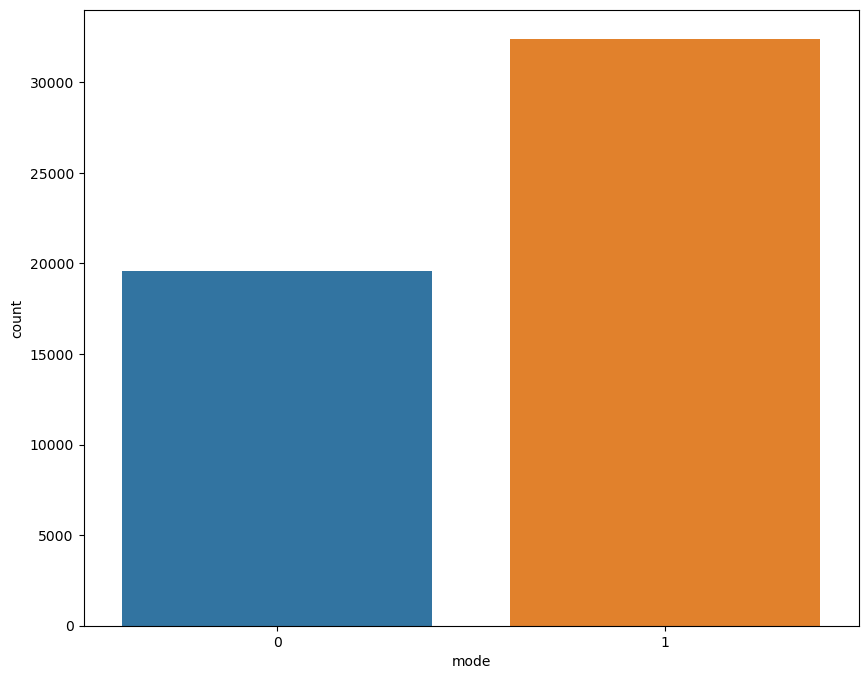

In [47]:
fig = plt.figure(figsize = (10, 8))
sns.countplot(x='mode', data = music)

In [48]:
# To address imbalanced data
smote = SMOTE(random_state=seed_value)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=seed_value)

In [49]:
# Standardizing the feature variable since SVMs are sensitive to the scale of the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [50]:
from sklearn.metrics import roc_auc_score
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
svm_auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print('The AUC:', svm_auc_roc)
print('Report for logistic Regression')
print(classification_report(y_test, y_pred_log_reg))

The AUC: 0.497219123150057
Report for logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      5757
           1       0.50      0.48      0.49      5732

    accuracy                           0.50     11489
   macro avg       0.50      0.50      0.50     11489
weighted avg       0.50      0.50      0.50     11489



In [51]:
from sklearn import svm
# Support Vector Machine
svm = svm.SVC(kernel = 'rbf', random_state = seed_value)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

svm_auc_roc = roc_auc_score(y_test, y_pred_svm)
print('The AUC:', svm_auc_roc)
print('Report for SVM')
print(classification_report(y_test, y_pred_svm))

The AUC: 0.5138001542101542
Report for SVM
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      5757
           1       0.52      0.44      0.47      5732

    accuracy                           0.51     11489
   macro avg       0.51      0.51      0.51     11489
weighted avg       0.51      0.51      0.51     11489



In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=seed_value).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Output some metrics
tree_auc_roc = roc_auc_score(y_test, tree_predictions)
tree_classification_report = classification_report(y_test, tree_predictions)
print('The AUC:', tree_auc_roc)
print('Report for DecisionTree')
print(tree_classification_report)

The AUC: 0.5320014858576246
Report for DecisionTree
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      5757
           1       0.53      0.50      0.52      5732

    accuracy                           0.53     11489
   macro avg       0.53      0.53      0.53     11489
weighted avg       0.53      0.53      0.53     11489



In [53]:
# Random Forest
forest_model = RandomForestClassifier(random_state=seed_value).fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Output some metrics
forest_auc_roc = roc_auc_score(y_test, forest_predictions)
forest_classification_report = classification_report(y_test, forest_predictions)
print('The AUC:', forest_auc_roc)
print('Report for Random Forest')
print(forest_classification_report)

The AUC: 0.5325676675538418
Report for Random Forest
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      5757
           1       0.53      0.52      0.53      5732

    accuracy                           0.53     11489
   macro avg       0.53      0.53      0.53     11489
weighted avg       0.53      0.53      0.53     11489



In [54]:
# Add more features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Drop the duplicate rows
unique_songs = music.drop_duplicates(subset=['artists', 'album_name', 'track_name'], keep='first')

X = unique_songs[features]
y = unique_songs['mode'].values.reshape(-1,1)

In [55]:
# To address imbalanced data
smote = SMOTE(random_state=seed_value)
X_smote, y_smote = smote.fit_resample(X, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=seed_value)

In [56]:
# Standardizing the feature variable since SVMs are sensitive to the scale of the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [57]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
svm_auc_roc = roc_auc_score(y_test, y_pred_log_reg)

print('The AUC:', svm_auc_roc)
print('Report for logistic Regression including mulitple features')
print(classification_report(y_test, y_pred_log_reg))

The AUC: 0.5
Report for logistic Regression including mulitple features
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5757
           1       0.00      0.00      0.00      5732

    accuracy                           0.50     11489
   macro avg       0.25      0.50      0.33     11489
weighted avg       0.25      0.50      0.33     11489



In [58]:
from sklearn import svm
# Support Vector Machine
svm = svm.SVC(kernel = 'rbf', random_state = seed_value)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

svm_auc_roc = roc_auc_score(y_test, y_pred_svm)
print('The AUC:', svm_auc_roc)
print('Report for SVM')
print(classification_report(y_test, y_pred_svm))

The AUC: 0.6308912624468455
Report for SVM
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      5757
           1       0.64      0.60      0.62      5732

    accuracy                           0.63     11489
   macro avg       0.63      0.63      0.63     11489
weighted avg       0.63      0.63      0.63     11489



In [59]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=seed_value).fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Output some metrics
tree_auc_roc = roc_auc_score(y_test, tree_predictions)
tree_classification_report = classification_report(y_test, tree_predictions)
print('The AUC:', tree_auc_roc)
print('Report for DecisionTree including mulitple features')
print(tree_classification_report)

The AUC: 0.6274645805749268
Report for DecisionTree including mulitple features
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      5757
           1       0.63      0.63      0.63      5732

    accuracy                           0.63     11489
   macro avg       0.63      0.63      0.63     11489
weighted avg       0.63      0.63      0.63     11489



In [60]:
# Random Forest
forest_model = RandomForestClassifier(random_state=seed_value).fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Output some metrics
forest_auc_roc = roc_auc_score(y_test, forest_predictions)
forest_classification_report = classification_report(y_test, forest_predictions)
print('The AUC:', forest_auc_roc)
print('Report for Random Forest including mulitple features')
print(forest_classification_report)

The AUC: 0.7065998327713183
Report for Random Forest including mulitple features
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      5757
           1       0.70      0.71      0.71      5732

    accuracy                           0.71     11489
   macro avg       0.71      0.71      0.71     11489
weighted avg       0.71      0.71      0.71     11489



### 8) Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? 
### How well does this work?

In [71]:
from sklearn.preprocessing import LabelEncoder

dummies = pd.get_dummies(music['track_genre'], prefix='genre')

# You can then join these dummy variables back to the original DataFrame if needed
data_with_dummies = music.join(dummies)

# Verify the operation
data_with_dummies.iloc[:,20:]

,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_alternative,genre_ambient,genre_anime,genre_black-metal,genre_bluegrass,genre_blues,genre_brazil,...,genre_grindcore,genre_groove,genre_grunge,genre_guitar,genre_happy,genre_hard-rock,genre_hardcore,genre_hardstyle,genre_heavy-metal,genre_hip-hop
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# Splitting data
X = music[features]
y = data_with_dummies.iloc[:,20:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# Creating and training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.05      0.09       196
           1       0.56      0.07      0.12       203
           2       0.10      0.05      0.07       200
           3       0.29      0.20      0.24       189
           4       0.39      0.17      0.24       196
           5       0.83      0.05      0.10       197
           6       0.60      0.26      0.36       191
           7       0.84      0.16      0.27       202
           8       0.53      0.25      0.34       187
           9       0.02      0.01      0.01       188
          10       0.62      0.09      0.16       198
          11       0.41      0.08      0.13       212
          12       0.74      0.07      0.12       213
          13       0.64      0.19      0.29       192
          14       0.83      0.28      0.42       199
          15       0.68      0.14      0.23       200
          16       0.68      0.42      0.52       224
          17       0.89    

In [74]:
# Calculate the AUC for each class
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=range(52))
auc_scores = roc_auc_score(y_test, y_pred, multi_class='ovr')  

print("AUC Scores by Class:", auc_scores)

AUC Scores by Class: 0.579061924546677


In [ ]:
pip install tensorflow

In [66]:
# Use principal components we extracted in question 6 with a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [79]:
from tensorflow.keras.utils import to_categorical

# Splitting the data into training and testing sets
X = origDataNewCoordinates

# There are 1000 songs per genre, which is a balanced data for modeling
y = data_with_dummies.iloc[:,20:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

num_features = X.shape[1]  

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(52, activation='softmax'))  

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
# An accuracy of approximately 27.92% indicates that the model correctly predicts the genre for around 27.92% of the songs in the test set.
# Given that there are 52 different genres, random guessing would give you an accuracy of about 1/52, or roughly 1.92%. 
# The model's accuracy is significantly better than random guessing, but it still suggests that the majority of predictions are incorrect.

Epoch 1/10
1300/1300 [==============================] - 2s 1ms/step - loss: 3.0040 - accuracy: 0.1999 - val_loss: 2.7860 - val_accuracy: 0.2349
Epoch 2/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.7595 - accuracy: 0.2448 - val_loss: 2.7254 - val_accuracy: 0.2488
Epoch 3/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.7070 - accuracy: 0.2556 - val_loss: 2.6985 - val_accuracy: 0.2548
Epoch 4/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.6721 - accuracy: 0.2629 - val_loss: 2.6653 - val_accuracy: 0.2637
Epoch 5/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.6435 - accuracy: 0.2704 - val_loss: 2.6558 - val_accuracy: 0.2681
Epoch 6/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.6224 - accuracy: 0.2750 - val_loss: 2.6332 - val_accuracy: 0.2727
Epoch 7/10
1300/1300 [==============================] - 2s 1ms/step - loss: 2.6022 - accuracy: 0.2810 - val_loss: 2.6135 - val_accuracy:

In [80]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Calculate the AUC for each class
auc_scores = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')  

print("AUC Scores by Class:", auc_scores)

325/325 [==============================] - 0s 893us/step
AUC Scores by Class: 0.8898731575376982


### 9) In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: 
### a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? 
### b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

Part a) The correlation coefficient of approximately 0.5694 suggests a moderate positive relationship between the average star ratings of songs and their popularity. The R-squared (0.30) indicates that about 30% of the variability in song popularity can be explained by the average star ratings. An R-squared of 0.30 is moderate, showing a certain level of predictive power but also leaving much room for other explanatory variables.
And Mean Squared Error is 433.75. A value of 433.75 suggests that the model's predictions are, on average, about √433.75 units away from the actual popularity scores 

In [81]:
# Part a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?
# Calculate the average ratings for each song
average_ratings = rating_imputed.mean(axis=0)

# Extract the first 5k songs' ratings and names
popularity_data = music.loc[:4999,'popularity']

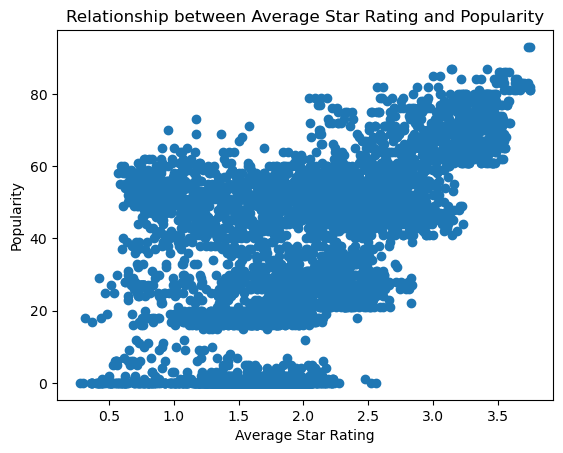

In [82]:
plt.scatter(average_ratings, popularity_data)
plt.xlabel('Average Star Rating')
plt.ylabel('Popularity')
plt.title('Relationship between Average Star Rating and Popularity')
plt.show()

In [83]:
correlation_coefficient, p_value = pearsonr(average_ratings, popularity_data)

correlation_coefficient, p_value # suggests a moderate positive relationship between the average star ratings of songs and their popularity.

(0.5694045329662333, 0.0)

In [84]:
# Linear Regression
X = average_ratings.values.reshape(-1, 1) 
y = popularity_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.30150163040309375
Mean Squared Error: 433.7528889037542


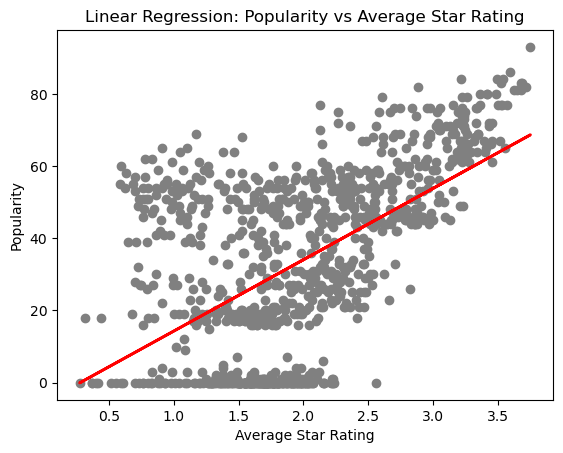

In [85]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Average Star Rating')
plt.ylabel('Popularity')
plt.title('Linear Regression: Popularity vs Average Star Rating')
plt.show()

In [86]:
# Part b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?
songs_info = music.iloc[:5000]
songs_info['AverageRating'] = average_ratings.values
songs_info.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,AverageRating
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.196939
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1.361029
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2.186377
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1.576998
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.038835


In [87]:
# Validate the data and remove the duplicates song
unique_songs = songs_info.drop_duplicates(subset=['artists', 'album_name', 'track_name'], keep='first')

# Sort the songs by popularity and find the top 10
top_10_songs = unique_songs.sort_values(by='AverageRating', ascending=False).head(10)
top_10_songs[[ 'artists', 'album_name', 'track_name', 'AverageRating']]

,artists,album_name,track_name,AverageRating
2260,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,3.744554
2562,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",3.743202
2105,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,3.737475
2003,The Neighbourhood,I Love You.,Sweater Weather,3.729389
2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,3.729124
3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),3.727451
3201,Evanescence,Fallen,Bring Me To Life,3.712598
3007,Linkin Park,Meteora,Numb,3.685801
2009,Nirvana,Nevermind (Remastered),Smells Like Teen Spirit,3.677518
2770,The Offspring,Americana,The Kids Aren't Alright,3.671891


### 10) You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. 
### How do these recommendations compare to the “greatest hits” from the previous question
### How good is your recommender system in making recommendations?

In [88]:
from sklearn.metrics.pairwise import cosine_similarity

ratings_df = rating

# Calculate the similarity matrix
similarity_matrix = cosine_similarity(ratings_df.fillna(0))

# Convert to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=ratings_df.index, columns=ratings_df.index)

# Predicting ratings
def predict_rating(user, item):
    # Users who also rated the item
    rated_by_others = ratings_df[item].dropna().index
    
    # Their similarities to the target user
    similarities = similarity_df[user][rated_by_others]
    
    # Their ratings for the item
    ratings = ratings_df.loc[rated_by_others, item]
    
    # Predicted rating
    return (similarities * ratings).sum() / similarities.sum()

In [89]:
def get_top_10_recommendations(user, ratings_df, similarity_df):
    # Get list of items not rated by the user
    unrated_items = ratings_df.iloc[user][ratings_df.iloc[user].isna()].index

    # Predict ratings for these unrated items
    predictions = {item: predict_rating(user, item) for item in unrated_items}

    # Sort the predicted ratings in descending order
    sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

    # Extract the top 10 item IDs
    top_10_items = [item[0] for item in sorted_predictions[:10]]

    return top_10_items

In [114]:
# Example usage
user_id = 2
top_10_recommendations_user2 = get_top_10_recommendations(user_id, ratings_df, similarity_df)
print(top_10_recommendations)

[3877, 3003, 2260, 2562, 3216, 3253, 3464, 2011, 2003, 3201]


In [115]:
relevant_items = top_10_songs['songNumber'].values

In [116]:
def calculate_hit_rate(top_n_recommendations, relevant_items):
    hits = 0
    for songNumber in top_n_recommendations:
        if songNumber in relevant_items:
            hits += 1
    return hits / len(top_n_recommendations)

calculate_hit_rate(top_10_recommendations_user2, relevant_items)

0.6

### Extra credit:  "Does the key in which a song is composed affect its popularity?"

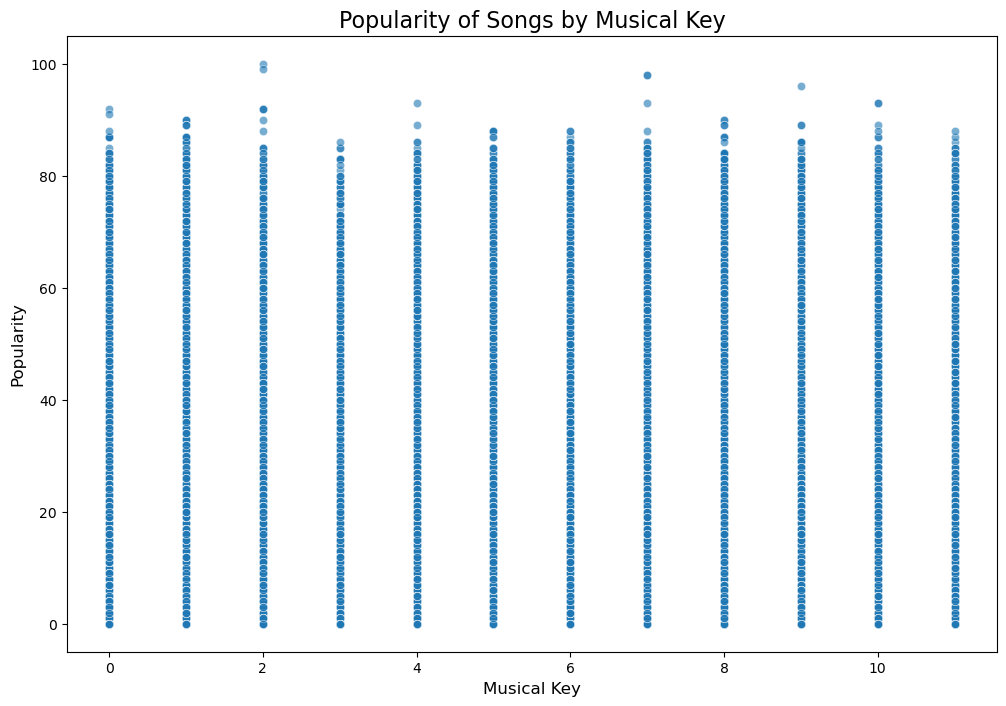

In [135]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='key', y='popularity', data=music, alpha=0.6)

# Adding title and labels
plt.title('Popularity of Songs by Musical Key', fontsize=16)
plt.xlabel('Musical Key', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Showing the plot
plt.show()

In [141]:
from scipy.stats import kruskal

# Performing Kruskal-Wallis Test to check if there are statistically significant differences in popularity across keys
groups = [music[music['key'] == k]['popularity'] for k in range(12)]

# Performing the Kruskal-Wallis Test
stat, p_value = kruskal(*groups)

# Displaying the test statistic and p-value
stat, p_value 
#The very low p-value (far below the standard significance level of 0.05) indicates that 
#there are statistically significant differences in the popularity of songs across different keys.

(66.4513215082093, 5.742004674570927e-10)

In [133]:
music.groupby('key').mean()['popularity']

key
0     33.195848
1     32.451003
2     33.610869
3     33.312303
4     34.706340
5     33.442082
6     33.644678
7     32.243649
8     33.505003
9     32.447419
10    31.880763
11    33.535870
Name: popularity, dtype: float64

In [143]:
music.groupby('key').mean()['popularity'].max()

34.706339567646346